## Introduction

This Colab notebook is used as a means to prepare the data given from https://www.ncei.noaa.gov/cdo-web/search?datasetid=GHCND for Seattle and St. Louis weather. To answer the question of whether it rains more in Seattle, Washington than St. Louis, Missouri we need to make sure that the data we are using is precise, organized, and usuable when answering the question. I will be exploring and performing any necessary arrangments to the original data sets to then export a cleaned version for a data analysis.

## Import libraries

This block of code is to just import the necessary libraries that will be needed to perform clean-up on the Seattle and St. Louis data sets. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
import missingno as msno

## Load the data

The NOAA National Centers for Environmental Information provides access to many types of environmental data, including records of daily precipitation.

We can use their [website](https://www.ncei.noaa.gov/cdo-web/search?datasetid=GHCND) to request records of daily precipitation from Seattle and St. Louis (or other locations of interest) for the last 5 years (2018 - 2022). 

I have already obtained the data. The data are available at this [github repository](https://github.com/varelandrew/Seattle-Weather) and are called `seattle_rain.csv` and `stl_rain.csv`.

This set of code just loads the two data sets into the variables df_seattle and df_stlouis from my Github repository.

In [2]:
df_seattle = pd.read_csv('https://raw.githubusercontent.com/varelandrew/Seattle-Weather/main/seattle_rain.csv')

In [3]:
df_stlouis = df_stlouis = pd.read_csv('https://raw.githubusercontent.com/varelandrew/Seattle-Weather/main/stl_rain.csv')

## Explore the contents of the data sets

This two lines of code are to just inspect the data frames info to check the data types, size of the data frame, and numbers of missing values.

In [4]:
df_seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658 entries, 0 to 1657
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  1658 non-null   object 
 1   NAME     1658 non-null   object 
 2   DATE     1658 non-null   object 
 3   DAPR     23 non-null     float64
 4   MDPR     23 non-null     float64
 5   PRCP     1636 non-null   float64
 6   SNOW     353 non-null    float64
 7   SNWD     66 non-null     float64
 8   WESD     15 non-null     float64
 9   WESF     28 non-null     float64
dtypes: float64(7), object(3)
memory usage: 129.7+ KB


In [5]:
df_stlouis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54574 entries, 0 to 54573
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  54574 non-null  object 
 1   NAME     54574 non-null  object 
 2   DATE     54574 non-null  object 
 3   DAPR     1166 non-null   float64
 4   MDPR     1163 non-null   float64
 5   PRCP     53143 non-null  float64
 6   SNOW     33167 non-null  float64
 7   SNWD     12835 non-null  float64
dtypes: float64(5), object(3)
memory usage: 3.3+ MB


As described above the types of data, size of the data frame, and number of missing values are outputted here for the Seattle and St. Louis data frames. You can also see the number of entries in the frame as well as how many columns of data there are. 

The two lines of code below are supposed to just showcase the data frames visually in a table of row and columns.

In [6]:
df_seattle

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
0,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/1/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
1,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/2/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
2,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/3/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
3,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/4/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
4,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/5/18,NaN,NaN,0.25,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1653,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",12/27/22,NaN,NaN,0.78,NaN,NaN,NaN,NaN
1654,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",12/28/22,NaN,NaN,0.40,NaN,NaN,NaN,NaN
1655,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",12/29/22,NaN,NaN,0.03,NaN,NaN,NaN,NaN
1656,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",12/30/22,NaN,NaN,0.62,NaN,NaN,NaN,NaN


In [7]:
df_stlouis

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD
0,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-01,NaN,NaN,0.00,0.0,NaN
1,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-03,NaN,NaN,0.35,NaN,NaN
2,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-04,NaN,NaN,0.03,NaN,NaN
3,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-05,NaN,NaN,0.04,1.2,NaN
4,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-06,NaN,NaN,0.00,0.0,1.0
...,...,...,...,...,...,...,...,...
54569,US1MOSL0084,"DES PERES 0.7 SSW, MO US",2022-12-08,NaN,NaN,0.00,NaN,NaN
54570,US1MOSL0084,"DES PERES 0.7 SSW, MO US",2022-12-13,NaN,NaN,0.00,0.0,NaN
54571,US1MOSL0084,"DES PERES 0.7 SSW, MO US",2022-12-14,NaN,NaN,0.89,NaN,NaN
54572,US1MOSL0084,"DES PERES 0.7 SSW, MO US",2022-12-15,NaN,NaN,0.36,NaN,NaN


What is outputted here is a table of rows and columns of the data frame for St. Louis and Seattle. There are some NaN values which will be dealt with later in the data preparation, so it is a bit cleaner.

## Convert data types, if necessary

These two lines of code are to convert the dates values in the Seattle and St. Louis data frames to datetime instead of leaving them in string form, because a plot will show successive values next to each other without recognizing possible gaps in dates. 

In [8]:
df_seattle['DATE'] = pd.to_datetime(df_seattle['DATE'])

In [9]:
df_stlouis['DATE'] = pd.to_datetime(df_stlouis['DATE'])

## Are the data suitable for answering the question?

This block of code is to showcase a plotted version of the Seattle data frame by plotting by date and precipitation values.

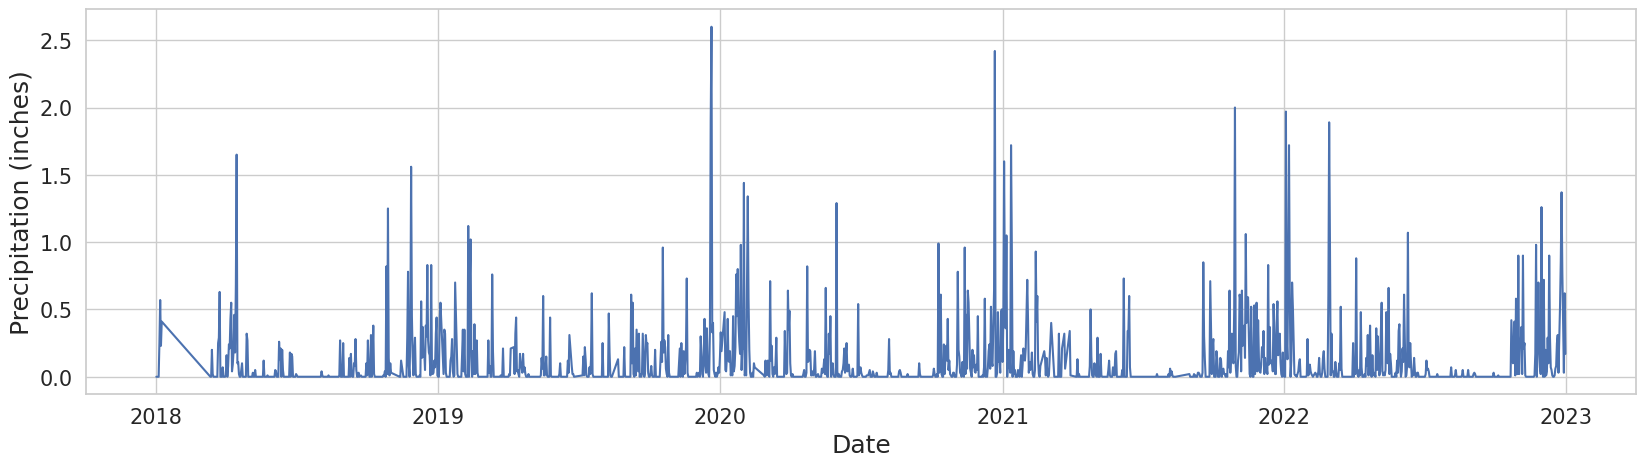

In [10]:
plt.figure(figsize=(20,5))

sns.lineplot(data=df_seattle, x='DATE', y='PRCP')

plt.xlabel('Date', fontsize=18)
plt.ylabel('Precipitation (inches)', fontsize=18)

plt.tick_params(labelsize=15);

What is outputted here is a graph with all of the dates from 2018-2023 on the x-axis and the amount of precipitation in inches in the y-axis for Seattle, Washington. 



This block of code is to showcase a plotted version of the St. Louis data frame by plotting by date and precipitation values.

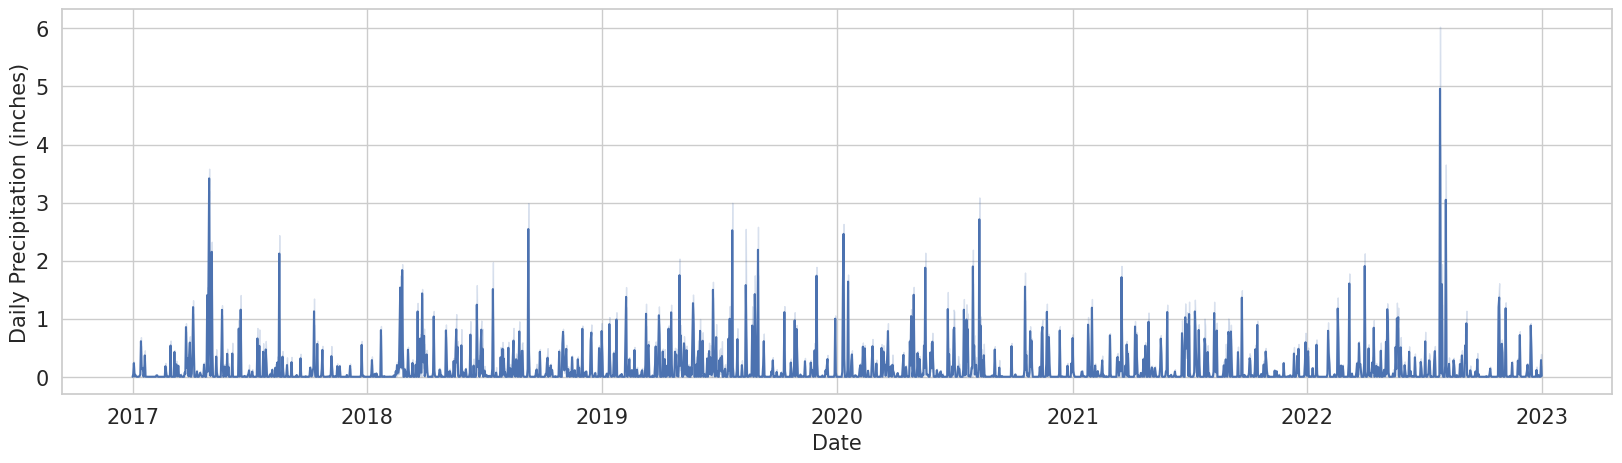

In [11]:
plt.figure(figsize = (20,5))

sns.lineplot(data = df_stlouis, x = 'DATE', y = 'PRCP')

plt.xlabel('Date', fontsize = 15)
plt.ylabel('Daily Precipitation (inches)', fontsize = 15)
plt.tick_params(labelsize=15);

What is outputted here is a graph with all of the dates from 2017-2023 on the x-axis and the amount of precipitation in inches in the y-axis for St. Louis, Missouri. 

## Select relevant subsets of the data

The line below limits the St. Louis data set to 2018-01-01 and above because it contained data prior to 2018 which the Seattle data set did not.

In [12]:
df_stlouis = df_stlouis.loc[df_stlouis['DATE'] >= '2018-01-01']

The line below limits the weather stations to just the St. Louis Lambert International Airport, because the Seattle data set had only one weather station. To keep it consistent I eliminated the rest of the weather stations and just kept one.

In [13]:
df_stlouis = df_stlouis.loc[df_stlouis['NAME'] == 'ST LOUIS LAMBERT INTERNATIONAL AIRPORT, MO US']

## Join data frames keeping `DATE` and `PRCP` columns

Here I joined the two data sets by using a left join on the date column. I did this because St. Louis has data for all dates whereas Seattle had a few pieces of missing data as shown previously.

In [14]:
df = df_stlouis[['DATE', 'PRCP']].merge(df_seattle[['DATE', 'PRCP']], on='DATE', how='left')

## Create a tidy data frame with columns for city and precipitation

Here I used pandas.melt to combine columns for precipitation by making a city column.

In [15]:
df = pd.melt(df, id_vars = 'DATE', var_name = 'CITY', value_name = 'PRCP')

### Rename columns or values to follow best practices

Here I am changing the names of PRCP_x and PRCP_y to abbrivations of the actual cities name STL and SEA.

In [16]:
df.loc[df['CITY']=='PRCP_x', 'CITY'] = 'STL'

In [17]:
df.loc[df['CITY']=='PRCP_y', 'CITY'] = 'SEA'

Here I am renaming the columns to be lowercase and more easily understood using the df.rename() function.

In [18]:
df = df.rename(columns={'DATE':'date', 'CITY':'city', 'PRCP':'precipitation'})

# Deal with missing values

This line of code is creating a new column in the data set called day_of_year where it coorelates the date with a number that refers to that day out of 365.

In [19]:
df['day_of_year'] = pd.DatetimeIndex(df['date']).day_of_year

This line of code gets the index of each row where precipitation is missing.

In [20]:
indices = np.where(df['precipitation'].isna()==True)[0]

Here I am computing the mean precipitation for each day in Seattle, averaged across years.

In [21]:
mean_day_precipitation = df.loc[df['city']=='SEA', ['precipitation', 'day_of_year']].groupby('day_of_year').mean()

This for loop here checks for each missing value, and replaces it with the mean daily precipitation calculated in the previous step.

In [22]:
for _, index in enumerate(indices):
    df.loc[index, 'precipitation'] = mean_day_precipitation.loc[df.loc[index,'day_of_year']].values[0]

In [23]:
df[df['precipitation'].isna()==True]

,date,city,precipitation,day_of_year


What's outputted here is a check to showcase that there is no more null values in the data set.

## Create relevant derived variables as new columns

Here I created two more columns that represent the month and year associated with the date. This allows for some creative plots to be made with more than just the date.

In [24]:
df['month'] = pd.DatetimeIndex(df['date']).month

In [25]:
df['year'] = pd.DatetimeIndex(df['date']).year

## Export the clean .csv file

In [26]:
from google.colab import files

df.to_csv('clean_seattle_stl_weather.csv', encoding = 'utf-8-sig', index=False) 

files.download('clean_seattle_stl_weather.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>